In [65]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy import stats

<b> Produces the Transfer and Native Student DataFrames for the given category:</b>

In [66]:
def scaled_categories(reflections, category, label, x, scale1, scale5):
    categoryIssue = 0
    for i in range(x):
        reflections[i][category] = reflections[i][category].replace(to_replace = scale1, value = 1)
        reflections[i][category] = reflections[i][category].replace(to_replace = "2", value = 2)
        reflections[i][category] = reflections[i][category].replace(to_replace = "3", value = 3)
        reflections[i][category] = reflections[i][category].replace(to_replace = "4", value = 4)    
        reflections[i][category] = reflections[i][category].replace(to_replace = scale5, value = 5)
        category_issue = reflections[i][category]
        DeID = reflections[i]["DeID"]
        s = label + str(i) 
        cat = DataFrame({"DeID": DeID, s: category_issue})
        if i == 0:
            categoryIssue = cat
        else:
            categoryIssue = pd.merge(categoryIssue, cat, on="DeID")
            
    df = pd.read_csv("CSE 11 Fall 2019 DeID\\DeID Pre-Survey CSE 11 Fall 2019.csv")
    status = df["Did.you.enter.UCSD.as.a.transfer.student.from.another..2.year.or.4.year..college.or.university."] == "Yes"
    DeID = df["DeID"]
    transferStatus = DataFrame({"DeID": DeID, "Transfer Status": status})

    mergedData = pd.merge(transferStatus, categoryIssue, on="DeID")
    transfer = mergedData[mergedData["Transfer Status"] == True]
    native = mergedData[mergedData["Transfer Status"] == False]
    
    return {'transfer' : transfer, 'native' : native}
    
        

<b> Produces the Diverging Graph Plot : </b>

In [67]:
def DivergingGraphPlot(transfer, native, label, graphTitle, X_title, Y_title):
    transferDistribution = [0,0,0,0,0]
    nativeDistribution = [0,0,0,0,0]
    for i in transfer.index:
        for j in transfer:
            if(j == "DeID" or j == "Transfer Status"):
                continue
            transferDistribution[int(transfer[j][i])-1] += 1;

    for i in native.index:
        for j in native:
            if(j == "DeID" or j == "Transfer Status"):
                continue
            nativeDistribution[int(native[j][i])-1] += 1;
    
    sumN = sum(nativeDistribution)
    sumT = sum(transferDistribution)
    for i in range(5):
        nativeDistribution[i] /= sumN/100
        transferDistribution[i] /= sumT/100
    
    d = {
    'Who' : ["Transfer", "Native"],
    '1 (Not at all)' : [transferDistribution[0],nativeDistribution[0]],
    '2' : [transferDistribution[1],nativeDistribution[1]],
    '3' : [transferDistribution[2],nativeDistribution[2]],
    '4' : [transferDistribution[3],nativeDistribution[3]],
    '5 (Significantly)' :[transferDistribution[4],nativeDistribution[4]]
    }
    df = pd.DataFrame(d)

    fig = go.Figure()
    for col in df.columns[1:]:
        fig.add_trace(go.Bar(x= df[col],
                             y =df['Who'],
                             orientation='h',
                             name= col,
                             hovertemplate="%{y}: %{x}"))    

    fig.update_layout(title=graphTitle,
                      xaxis_title=X_title,
                      yaxis_title=Y_title,
                      legend_title="Scale",
                      barmode='relative', 
                      height=400, 
                      width=700, 
                      yaxis_autorange='reversed',
                      bargap=0.01,
                      legend_orientation ='h',
                      legend_x=0.05, legend_y=1.2
                     )
    
    return fig

<b> Produces the Line Graph: </b>

In [68]:
def plotLineGraph(transfer, native, label, graphTitle, X_title, Y_title, x_label, x):
    transferIssues = []
    nativeIssues = []
    difference = []
    ttestStatistics = []
    pValuesT = []
    utestStatistics = []
    pValuesU = []
    for i in range(x):
        transferIssues.append(transfer[label+str(i)].mean())
        nativeIssues.append(native[label+str(i)].mean())
        difference.append(transferIssues[i] - nativeIssues[i])
        ttest_results = stats.ttest_ind(transfer[label+str(i)], native[label+str(i)])
        utest_results = stats.mannwhitneyu(transfer[label+str(i)], native[label+str(i)])
        ttestStatistics.append(ttest_results[0])
        pValuesT.append(ttest_results[1])
        utestStatistics.append(utest_results[0])
        pValuesU.append(utest_results[1])
        
    df = DataFrame({"Week" : Series(x_label), 
                    "Transfer Mean" : Series(transferIssues), 
                    "Native Mean" : Series(nativeIssues), 
                    "Difference" : difference, 
                    "Test Statistic (t-test)" : ttestStatistics ,
                    "p-value (t-test)" : pValuesT,
                    "Test Statistic (u-test)" : utestStatistics,
                    "p-value (u-test)" : pValuesU})
    
    
    plt.plot(x_label, transferIssues, "-ok", color='blue')
    plt.plot(x_label, nativeIssues, "-ok", color='green')
    plt.ylim(0.5, 5.5)
    plt.legend(['transfers','natives'])
    plt.suptitle(graphTitle, fontsize=14)
    plt.xlabel(X_title, fontsize=10)
    plt.ylabel(Y_title, fontsize=10)
    
    return df

<h1> CSE 11: </h1>

In [69]:
reflections = []
for i in range (2,10):
    reflections.append(pd.read_csv(r"CSE 11 Fall 2019 DeID\DeID Weekly Reflection (CSE 11 PA" +str(i)+").csv"))

<h3> How Challenging was the Coursework: </h3>

In [70]:
category = "How.challenging.was.the.work.for.this.class.this.week."
label = "Challenging"
graphTitle = "How Challenging was the Coursework"
X_title = "Percentage"
Y_title = "Student Type"
x = 8
scale1 = "1"
scale5 = "5"
data = scaled_categories(reflections, category, label, x, scale1, scale5)
transfer = data['transfer']
native = data['native']

     Week  Transfer Mean  Native Mean  Difference  Test Statistic (t-test)  \
0  Week 2       3.352941        3.170    0.182941                 0.715695   
1  Week 3       3.411765        3.210    0.201765                 0.922062   
2  Week 4       2.941176        2.855    0.086176                 0.340531   
3  Week 5       3.823529        3.425    0.398529                 1.809820   
4  Week 6       3.705882        3.170    0.535882                 2.107753   
5  Week 7       3.000000        2.705    0.295000                 1.292096   
6  Week 8       3.352941        3.405   -0.052059                -0.213611   
7  Week 9       3.294118        3.140    0.154118                 0.663761   

   p-value (t-test)  Test Statistic (u-test)  p-value (u-test)  
0          0.474956                   1531.0          0.239102  
1          0.357530                   1518.5          0.217424  
2          0.733790                   1632.0          0.388372  
3          0.071720                  

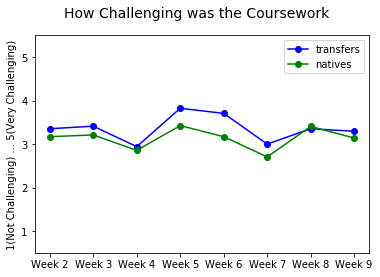

In [71]:
fig = DivergingGraphPlot(transfer, native, label, graphTitle, X_title, Y_title)
fig.show()

X_label = ""
Y_label = "1(Not Challenging) ... 5(Very Challenging)"
x_label = ["Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8", "Week 9"]
graphLabel = "How Challenging was the Coursework"
df1 = plotLineGraph(transfer, native, label, graphLabel, X_label, Y_label, x_label, x)
print(df1)

<h3> Satisfaction With Coursework:</h3>

In [72]:
category = "What.is.your.current.overall.satisfaction.with.your.performance.in.this.class."
label = "Satisfaction"
graphTitle = "How Satisfied are you with your Performance"
X_title = "Percentage"
Y_title = "Student Type"
x = 8
scale1 = "1"
scale5 = "5"
data = scaled_categories(reflections, category, label, x, scale1, scale5)
transfer = data['transfer']
native = data['native']

     Week  Transfer Mean  Native Mean  Difference  Test Statistic (t-test)  \
0  Week 2       3.764706        3.880   -0.115294                -0.586497   
1  Week 3       3.705882        3.890   -0.184118                -0.996022   
2  Week 4       4.000000        3.855    0.145000                 0.735870   
3  Week 5       3.352941        3.720   -0.367059                -1.715612   
4  Week 6       2.588235        3.440   -0.851765                -3.554863   
5  Week 7       3.235294        3.570   -0.334706                -1.498427   
6  Week 8       3.294118        3.540   -0.245882                -1.103636   
7  Week 9       3.411765        3.630   -0.218235                -1.011736   

   p-value (t-test)  Test Statistic (u-test)  p-value (u-test)  
0          0.558157                   1553.0          0.256737  
1          0.320359                   1535.0          0.229213  
2          0.462612                   1562.5          0.273202  
3          0.087674                  

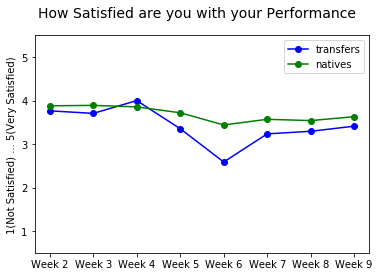

In [73]:
fig = DivergingGraphPlot(transfer, native, label, graphTitle, X_title, Y_title)
fig.show()

X_label = ""
Y_label = "1(Not Satisfied) ... 5(Very Satisfied)"
x_label = ["Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8", "Week 9"]
graphLabel = "How Satisfied are you with your Performance"
df2 = plotLineGraph(transfer, native, label, graphLabel, X_label, Y_label, x_label, x)
print(df2)

Text(0, 0.5, 'Difference')

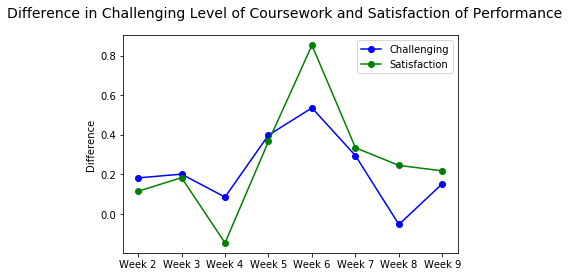

In [74]:
plt.plot(x_label, df1["Difference"], "-ok", color='blue')
plt.plot(x_label, -df2["Difference"], "-ok", color='green')
plt.legend(['Challenging','Satisfaction'])
plt.suptitle("Difference in Challenging Level of Coursework and Satisfaction of Performance", fontsize=14)
plt.ylabel("Difference", fontsize=10)

<h3> Prior Programming Experience </h3>

In [76]:
category="Experience"
df = pd.read_csv("CSE 11 Fall 2019 DeID\\DeID Pre-Survey CSE 11 Fall 2019.csv")
experience = df["On.a.scale.of.1.to.5..how.much.experience.did.you.have.with.programming.computer.science.before.you.took.your.FIRST.course.at.UC.San.Diego."]
status = df["Did.you.enter.UCSD.as.a.transfer.student.from.another..2.year.or.4.year..college.or.university."] == "Yes"
DeID = df["DeID"]
ExperienceLevel = DataFrame({"DeID": DeID, "Transfer Status": status, "Experience" : experience})

ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "1", value = 1)
ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "2", value = 2)
ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "3", value = 3)
ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "4", value = 4)    
ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "5", value = 5)
ExperienceLevel[category] = ExperienceLevel[category].replace(to_replace = "NaN", value = 5)


transfer = ExperienceLevel[ExperienceLevel["Transfer Status"] == True]
native = ExperienceLevel[ExperienceLevel["Transfer Status"] == False]

native = native.dropna(axis=0)

In [77]:
graphTitle = "Experience"
X_title = "Percentage"
Y_title = "Student Type"

transferDistribution = [0,0,0,0,0]
nativeDistribution = [0,0,0,0,0]
for i in transfer.index:
    transferDistribution[int(transfer["Experience"][i])-1] += 1;

for i in native.index:
    nativeDistribution[int(native["Experience"][i])-1] += 1;

sumN = sum(nativeDistribution)
sumT = sum(transferDistribution)
for i in range(5):
    nativeDistribution[i] /= sumN/100
    transferDistribution[i] /= sumT/100

d = {
'Who' : ["Transfer", "Native"],
'1 (Not at all)' : [transferDistribution[0],nativeDistribution[0]],
'2' : [transferDistribution[1],nativeDistribution[1]],
'3' : [transferDistribution[2],nativeDistribution[2]],
'4' : [transferDistribution[3],nativeDistribution[3]],
'5 (Significantly)' :[transferDistribution[4],nativeDistribution[4]]
}
df = pd.DataFrame(d)

fig = go.Figure()
for col in df.columns[1:]:
    fig.add_trace(go.Bar(x= df[col],
                         y =df['Who'],
                         orientation='h',
                         name= col,
                         hovertemplate="%{y}: %{x}"))    

fig.update_layout(title=graphTitle,
                  xaxis_title=X_title,
                  yaxis_title=Y_title,
                  legend_title="Scale",
                  barmode='relative', 
                  height=400, 
                  width=700, 
                  yaxis_autorange='reversed',
                  bargap=0.01,
                  legend_orientation ='h',
                  legend_x=0.05, legend_y=1.2
                 )

fig.show()

ttest_results = stats.ttest_ind(transfer["Experience"], native["Experience"])
utest_results = stats.mannwhitneyu(transfer["Experience"], native["Experience"])
print(ttest_results)
print(utest_results)

Ttest_indResult(statistic=1.3131623478404437, pvalue=0.189760916414885)
MannwhitneyuResult(statistic=11486.0, pvalue=0.13601145455954644)


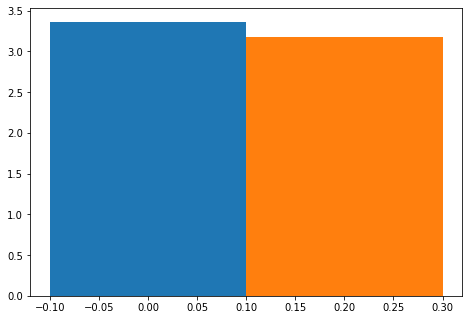

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Tstudents = [transfer["Experience"].mean()]
Nstudents = [native["Experience"].mean()]
ax.bar(0,Tstudents,0.2)
ax.bar(0.2,Nstudents,0.2)

plt.show()